In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
import os
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
data = pd.read_csv("../Data/balanced_data.csv")

In [4]:
data.head()

,indegree,outdegree,in_btc,out_btc,in_malicious,out_malicious,is_malicious
0,1,2,97.026633,97.026633,0,0,1
1,1,2,97.916823,97.916445,0,0,1
2,1,2,0.090000,0.089500,0,0,0
3,1,2,0.620000,0.619500,0,0,0
4,1,2,0.024326,0.024226,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   indegree       100000 non-null  int64  
 1   outdegree      100000 non-null  int64  
 2   in_btc         100000 non-null  float64
 3   out_btc        100000 non-null  float64
 4   in_malicious   100000 non-null  int64  
 5   out_malicious  100000 non-null  int64  
 6   is_malicious   100000 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 5.3 MB


In [6]:
data.describe()

,indegree,outdegree,in_btc,out_btc,in_malicious,out_malicious,is_malicious
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.00000
mean,12.841270,1.999580,1439.221697,1400.913867,0.004020,0.0,0.50169
std,41.259199,3.465781,4214.058334,4208.752012,0.063276,0.0,0.50000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000
25%,1.000000,2.000000,0.931782,0.915150,0.000000,0.0,0.00000
50%,1.000000,2.000000,50.063223,50.026857,0.000000,0.0,1.00000
75%,7.000000,2.000000,614.070880,489.920468,0.000000,0.0,1.00000
max,579.000000,686.000000,451943.762531,451943.762531,1.000000,0.0,1.00000


In [7]:
# create training and testing vars
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['is_malicious']), data['is_malicious'], test_size=0.2)

print(X_train.shape, y_train.shape)

(80000, 6) (80000,)


In [8]:
def show_result(actual, predicted, model):
    cm = metrics.confusion_matrix(actual, predicted)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = '{0}\nAccuracy Score: {1}%'.format(model, metrics.accuracy_score(actual, predicted)*100)
    plt.title(all_sample_title, size=12)
    plt.show()

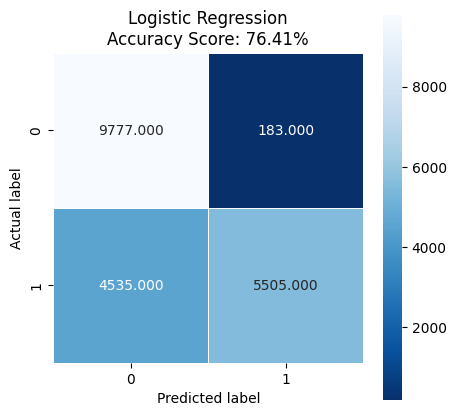

In [9]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train, )

# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

show_result(y_test, y_pred_class, "Logistic Regression")

# save model
import pickle

filename = './Models/logistic_regression_model.sav'
pickle.dump(logreg, open(filename, 'wb'))

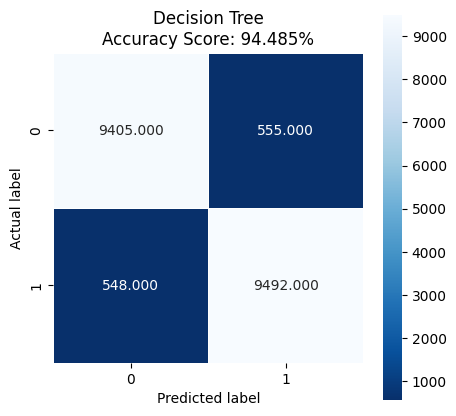

In [10]:
# train a decision tree model on the training set
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

# make class predictions for the testing set
y_pred_class = dtree.predict(X_test)

show_result(y_test, y_pred_class, "Decision Tree")

# save model
filename = './Models/decision_tree_model.sav'
pickle.dump(dtree, open(filename, 'wb'))

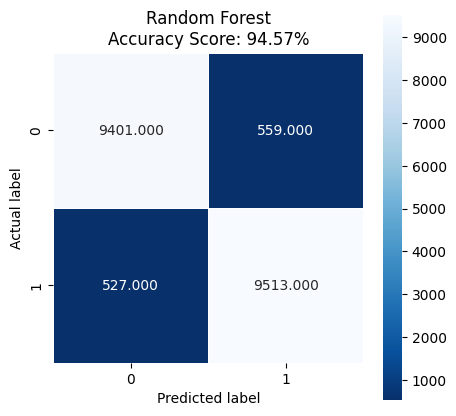

In [11]:
# train a random forest model on the training set
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)

rfc.fit(X_train, y_train)

# make class predictions for the testing set
y_pred_class = rfc.predict(X_test)

show_result(y_test, y_pred_class, "Random Forest")

# save model
filename = './Models/random_forest_model.sav'
pickle.dump(rfc, open(filename, 'wb'))

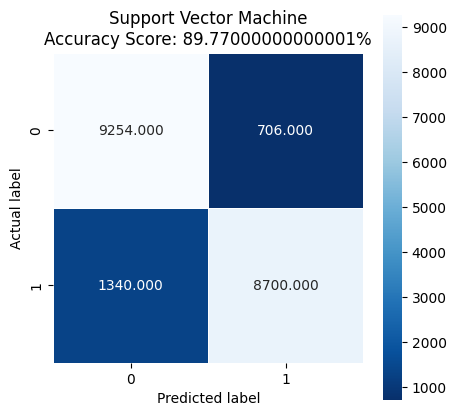

In [12]:
# train a support vector machine model on the training set
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

# make class predictions for the testing set
y_pred_class = svc.predict(X_test)

show_result(y_test, y_pred_class, "Support Vector Machine")

# save model
filename = './Models/support_vector_machine_model.sav'
pickle.dump(svc, open(filename, 'wb'))

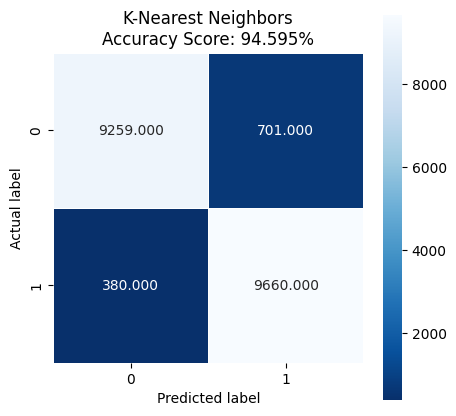

In [13]:
# train a k-nearest neighbors model on the training set
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

show_result(y_test, y_pred_class, "K-Nearest Neighbors")

# save model
filename = './Models/k_nearest_neighbors_model.sav'
pickle.dump(knn, open(filename, 'wb'))

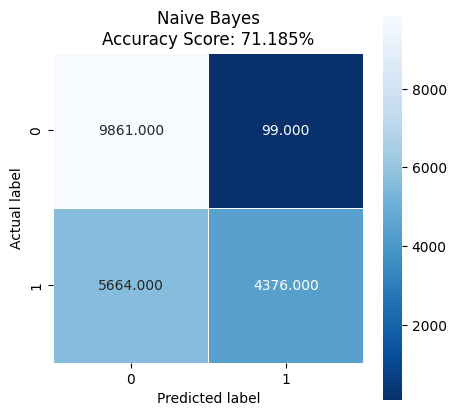

In [14]:
# train a naive bayes model on the training set
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)

# make class predictions for the testing set
y_pred_class = nb.predict(X_test)

show_result(y_test, y_pred_class, "Naive Bayes")

# save model
filename = './Models/naive_bayes_model.sav'
pickle.dump(nb, open(filename, 'wb'))

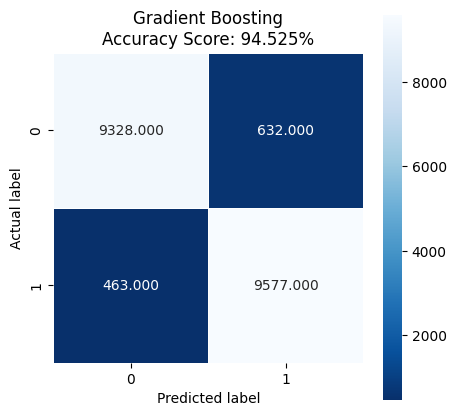

In [15]:
# train a gradient boosting model on the training set
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

gb.fit(X_train, y_train)

# make class predictions for the testing set
y_pred_class = gb.predict(X_test)

show_result(y_test, y_pred_class, "Gradient Boosting")

# save model
filename = './Models/gradient_boosting_model.sav'
pickle.dump(gb, open(filename, 'wb'))

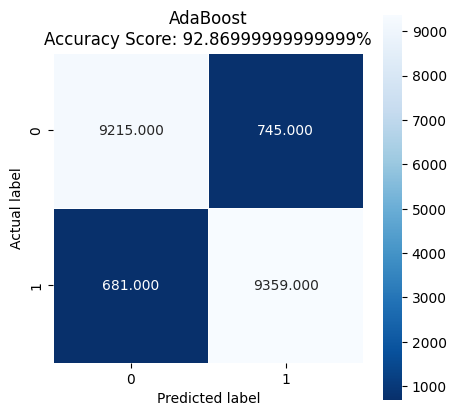

In [16]:
# train a adaboost model on the training set
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier()

ab.fit(X_train, y_train)

# make class predictions for the testing set
y_pred_class = ab.predict(X_test)

show_result(y_test, y_pred_class, "AdaBoost")

# save model
filename = './Models/adaboost_model.sav'
pickle.dump(ab, open(filename, 'wb'))

[18:02:10] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


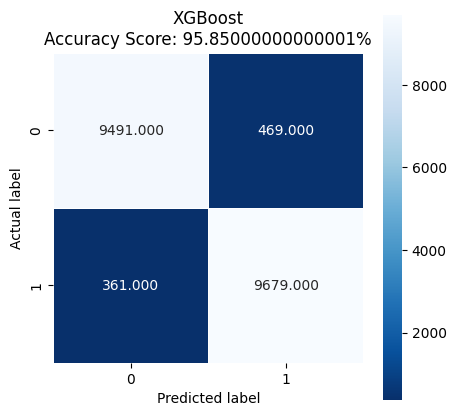

In [19]:
# train a xgboost model on the training set
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train.to_numpy(), y_train.to_numpy())

# make class predictions for the testing set
y_pred_class = xgb.predict(X_test)

show_result(y_test, y_pred_class, "XGBoost")

# save model
filename = './Models/xgboost_model.sav'
pickle.dump(xgb, open(filename, 'wb'))